In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import time
%matplotlib notebook
sn.set_style("ticks",sn.axes_style({'axes.grid': True}))

def distance(a,b):
    d = np.sqrt( (b[0]-a[0])**2 + (b[1]-a[1])**2 + (b[2]-a[2])**2 )
    return d

In [2]:
random = np.loadtxt('10k_weighted_random.dat')
data = np.loadtxt('10k_weighted_north_cmass.dat')

<IPython.core.display.Javascript object>


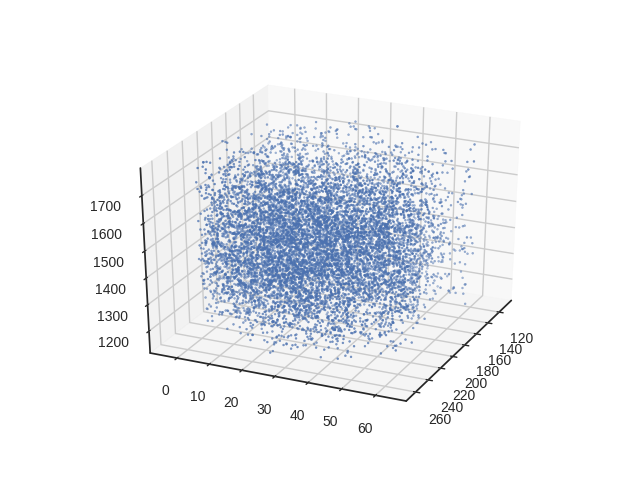

<IPython.core.display.Javascript object>


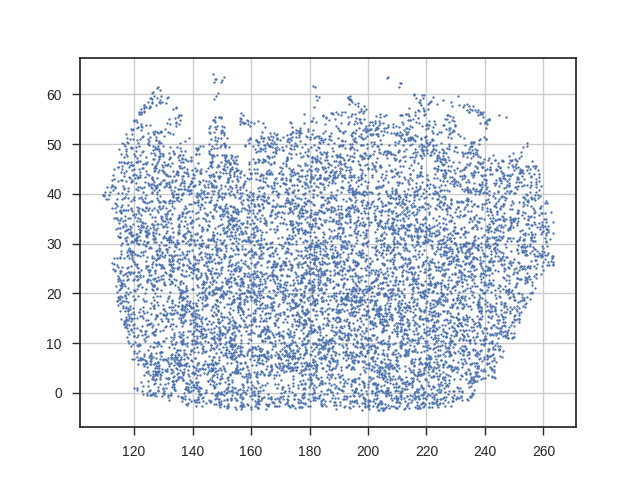

<IPython.core.display.Javascript object>


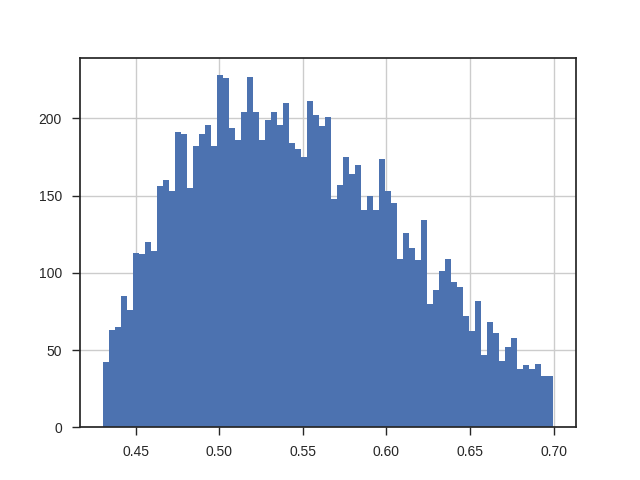

<IPython.core.display.Javascript object>


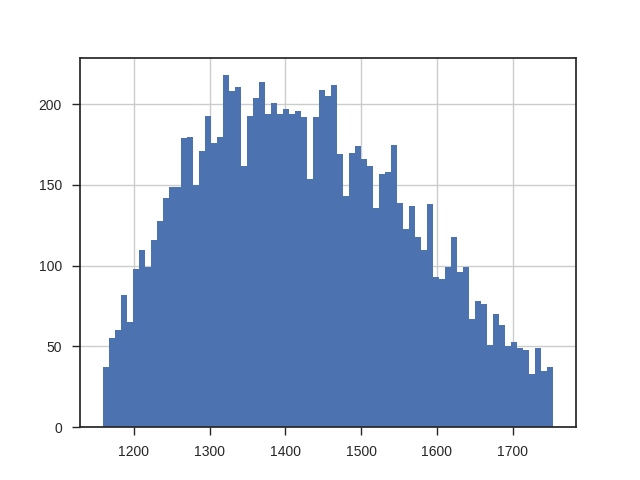

In [152]:
dt=data.transpose()

plt.figure()
ax=plt.axes(projection="3d")
ax.scatter(dt[0],dt[1],dt[3],s=2)

plt.figure()
plt.scatter(dt[0],dt[1],s=2,marker='H')

plt.figure()
zhist = plt.hist(dt[2],bins=75)

plt.figure()
cdhist =  plt.hist(dt[3],bins=75)




In [73]:
from astropy import units as u
from astropy.coordinates import SkyCoord

<IPython.core.display.Javascript object>


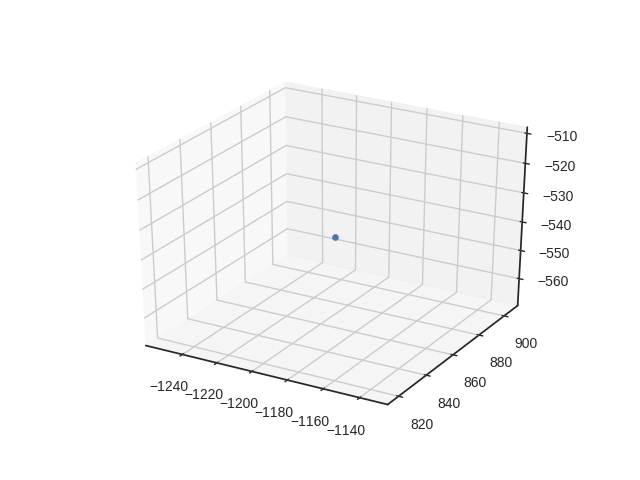

In [120]:
coords=SkyCoord(ra=dt[0]*u.degree,dec=dt[1]*u.degree)

cart= coords.cartesian

plt.figure()
c = plt.axes(projection='3d')

c.scatter(cart.x,cart.y,cart.z,s=2)

In [164]:
# z=v/c , v=h_0*d , z*c = h_0*d -> d=(z*c)/h_0
# ra = theta
# dec = phi

newpts=[]
newpts2=[]




for i in range(len(dt[0])):
    ra = dt[0,i]
    dec = dt[1,i]
    #zr=dt[2,i]
    cmd=dt[3,i]
    
    ############################
    
    x=cmd*np.cos(ra)*np.sin(dec)
    y=cmd*np.sin(ra)*np.cos(dec)
    z=cmd*np.cos(dec)
    
    ############################
    
    x2=cmd*np.cos(ra)*np.cos(dec)
    y2=cmd*np.sin(ra)*np.cos(dec)
    z2=cmd*np.sin(dec)
    
    ############################
    
    
    xyz=[x,y,z]
    xyz2=[x2,y2,z2]
    newpts.append(xyz)
    newpts2.append(xyz2)

<IPython.core.display.Javascript object>


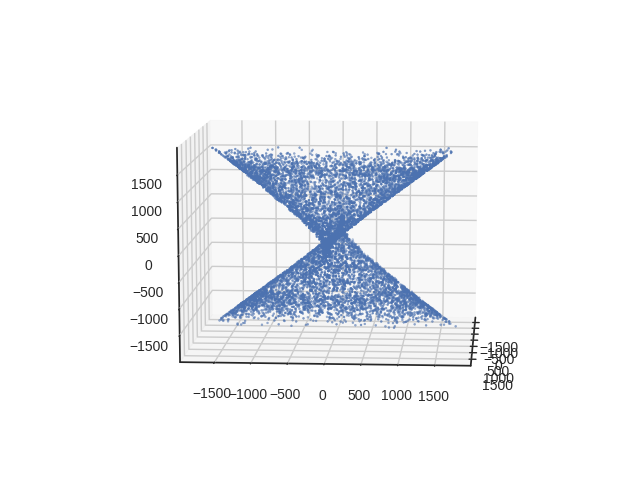

In [165]:
ptst=np.array(newpts).transpose()
plt.figure()

pts=plt.axes(projection='3d')
pts.scatter(ptst[0],ptst[1],ptst[2],s=2)

<IPython.core.display.Javascript object>


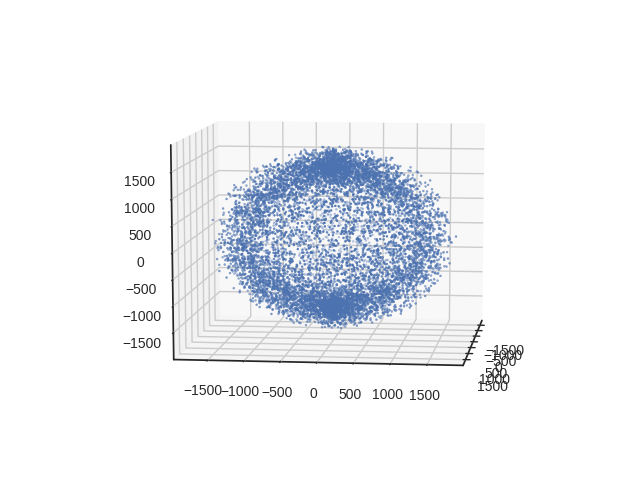

In [166]:
ptst2=np.array(newpts2).transpose()
plt.figure()

pts2=plt.axes(projection='3d')
pts2.scatter(ptst2[0],ptst2[1],ptst2[2],s=2)